In [1]:
import pandas as pd
import numpy as np

#load data
data = pd.read_csv('dataset/titanic.csv')

#preview data

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#predict Survived Column (labels 0 = didnt survived, 1 = survived)

target = ['Survived']

#Columns to use as features
training_features = ['Age', 'Pclass', 'Sex', 'Fare']

#split data
features = data[training_features]
labels = data[target]

#clean Data. ie NaN values
print features['Sex'].isnull().sum()
print features['Pclass'].isnull().sum()
print features['Fare'].isnull().sum()
print features['Age'].isnull().sum() 


0
0
0
177


In [14]:
#Age has NaN values, that we can 'fill' with the median value
features['Age'] = features['Age'].fillna(features['Age'].median())
print features['Age'].isnull().sum() 

0


/Users/stephanie/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Sex values are female, male. SKlearn cannot take string values for categorical they have to be numeric, 
# thus we have to transform values
d = {'male' : 0, 'female' : 1}
features['Sex'] = features['Sex'].apply(lambda x:d[x])
features['Sex'].head()

/Users/stephanie/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [24]:
#Final dataset
features.head()

Age       28.0000
Pclass     1.0000
Sex        0.0000
Fare      27.7208
Name: 295, dtype: float64
Age       24.0000
Pclass     3.0000
Sex        0.0000
Fare       7.8958
Name: 294, dtype: float64


In [25]:
#Build the model
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state =42)

#train the model

#LinearSVC
from sklearn import svm
clf = svm.LinearSVC()

clf.fit(features_train, labels_train)

print clf



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/Users/stephanie/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
#make predictions
print features_test[0:1]
print clf.predict(features_test[0:1])

print features_test[0:10]
print clf.predict(features_test[0:10])

      Age  Pclass  Sex     Fare
709  28.0       3    0  15.2458
[0]
      Age  Pclass  Sex     Fare
709  28.0       3    0  15.2458
439  31.0       2    0  10.5000
840  20.0       3    0   7.9250
720   6.0       2    1  33.0000
39   14.0       3    1  11.2417
290  26.0       1    1  78.8500
300  28.0       3    1   7.7500
333  16.0       3    0  18.0000
208  16.0       3    1   7.7500
136  19.0       1    1  26.2833
[0 0 0 1 1 1 0 0 1 1]


In [33]:
#check accuracy of model
print clf.score(features_test, labels_test)

0.8


In [37]:
#comparing with other models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, features_train, labels_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.783644 (0.067297)
LDA: 0.780311 (0.067515)
KNN: 0.698051 (0.035257)
CART: 0.766808 (0.052552)


/Users/stephanie/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


NB: 0.756723 (0.063507)
SVM: 0.654379 (0.036497)


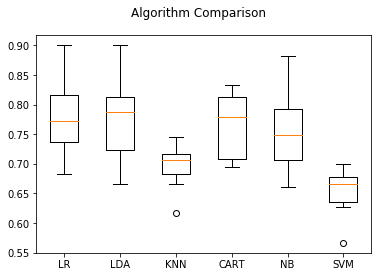

In [38]:
import matplotlib.pyplot as plt
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()